In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

In [8]:
df = pd.read_csv("CS.csv")

In [9]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [10]:
df.tail()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
65459,463605,Female,No,23,No,Healthcare,0.0,Low,5.0,Cat_5,D
65460,459531,Male,No,38,Yes,Marketing,3.0,Low,NaN,Cat_6,D
65461,464608,Female,Yes,49,Yes,Artist,0.0,Average,3.0,Cat_6,C
65462,459960,Female,Yes,56,Yes,NaN,1.0,Low,1.0,Cat_6,B
65463,459597,Female,Yes,71,Yes,Artist,1.0,High,2.0,Cat_6,C


In [11]:
df=df.drop(['Var_1','ID'], axis=1)

In [12]:
df.shape

(65464, 9)

In [13]:
numeric_features = ['Age', 'Work_Experience', 'Family_Size']

Q1 = df[numeric_features].quantile(0.25)
Q3 = df[numeric_features].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = (df[numeric_features] < (Q1 - 1.5 * IQR)) | (df[numeric_features] > (Q3 + 1.5 * IQR))

# Show number of outliers per feature
print(outliers.sum())

Age                 548
Work_Experience    1515
Family_Size         776
dtype: int64


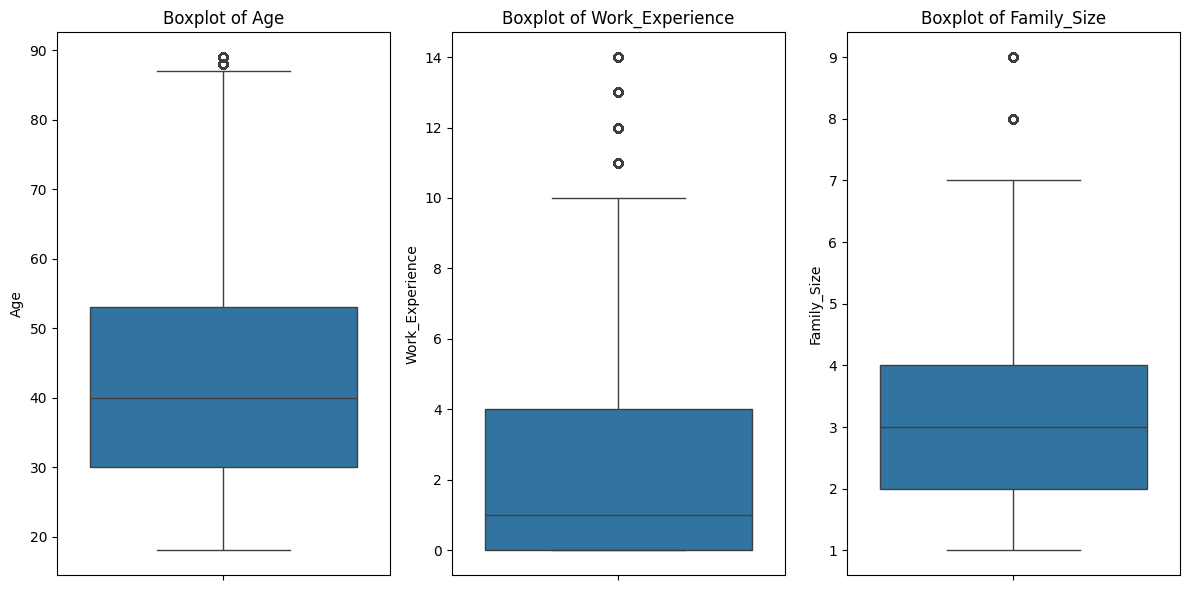

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot for each numeric feature to visualize outliers
plt.figure(figsize=(12, 6))

# Plotting Age, Work_Experience, and Family_Size side by side
for i, feature in enumerate(numeric_features):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

In [15]:
# Define numeric features for outlier detection
numeric_features = ['Age', 'Work_Experience', 'Family_Size']

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df[numeric_features].quantile(0.25)
Q3 = df[numeric_features].quantile(0.75)
IQR = Q3 - Q1

# Filter the dataset to remove outliers
df_no_outliers = df[~((df[numeric_features] < (Q1 - 1.5 * IQR)) | (df[numeric_features] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Check the shape of the new dataset without outliers
print(f"Original dataset shape: {df.shape}")
print(f"Dataset shape after outlier removal: {df_no_outliers.shape}")

Original dataset shape: (65464, 9)
Dataset shape after outlier removal: (62673, 9)


In [16]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,A


In [17]:
df.shape

(65464, 9)

In [18]:
df['Segmentation'].value_counts()

Segmentation
D    18605
A    16125
C    16051
B    14683
Name: count, dtype: int64

In [19]:
df.isnull().sum()

Gender                0
Ever_Married       1125
Age                   0
Graduated           652
Profession         1025
Work_Experience    6775
Spending_Score        0
Family_Size        2763
Segmentation          0
dtype: int64

In [20]:
df=df.dropna()

In [21]:
df.isnull().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Segmentation       0
dtype: int64

In [22]:
df.columns

Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Segmentation'],
      dtype='object')

In [23]:
df.shape

(54387, 9)

In [24]:
numeric_features = ['Age', 'Work_Experience', 'Family_Size']

Q1 = df[numeric_features].quantile(0.25)
Q3 = df[numeric_features].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = (df[numeric_features] < (Q1 - 1.5 * IQR)) | (df[numeric_features] > (Q3 + 1.5 * IQR))

# Show number of outliers per feature
print(outliers.sum())

Age                 419
Work_Experience    1394
Family_Size         636
dtype: int64


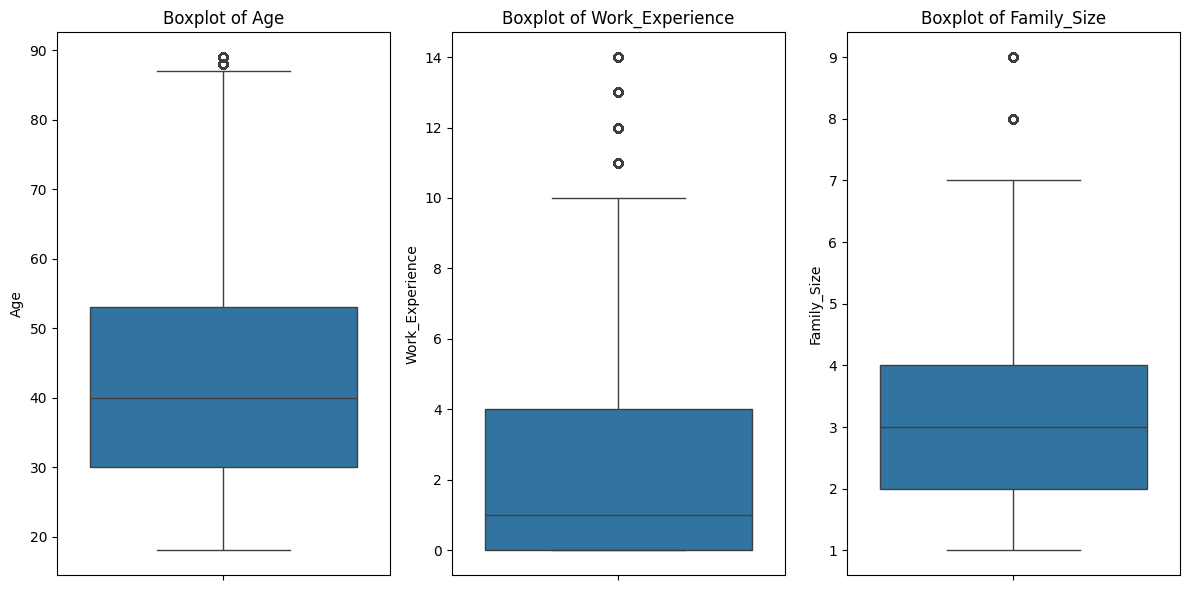

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot for each numeric feature to visualize outliers
plt.figure(figsize=(12, 6))

# Plotting Age, Work_Experience, and Family_Size side by side
for i, feature in enumerate(numeric_features):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

In [26]:
# Define numeric features for outlier detection
numeric_features = ['Age', 'Work_Experience', 'Family_Size']

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df[numeric_features].quantile(0.25)
Q3 = df[numeric_features].quantile(0.75)
IQR = Q3 - Q1

# Filter the dataset to remove outliers
df = df[~((df[numeric_features] < (Q1 - 1.5 * IQR)) | (df[numeric_features] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Check the shape of the new dataset without outliers
print(f"Original dataset shape: {df.shape}")
print(f"Dataset shape after outlier removal: {df_no_outliers.shape}")

Original dataset shape: (51986, 9)
Dataset shape after outlier removal: (62673, 9)


In [27]:
df.shape

(51986, 9)

In [28]:
numeric_features = ['Age', 'Work_Experience', 'Family_Size']

Q1 = df[numeric_features].quantile(0.25)
Q3 = df[numeric_features].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = (df[numeric_features] < (Q1 - 1.5 * IQR)) | (df[numeric_features] > (Q3 + 1.5 * IQR))

# Show number of outliers per feature
print(outliers.sum())

Age                173
Work_Experience      0
Family_Size          0
dtype: int64


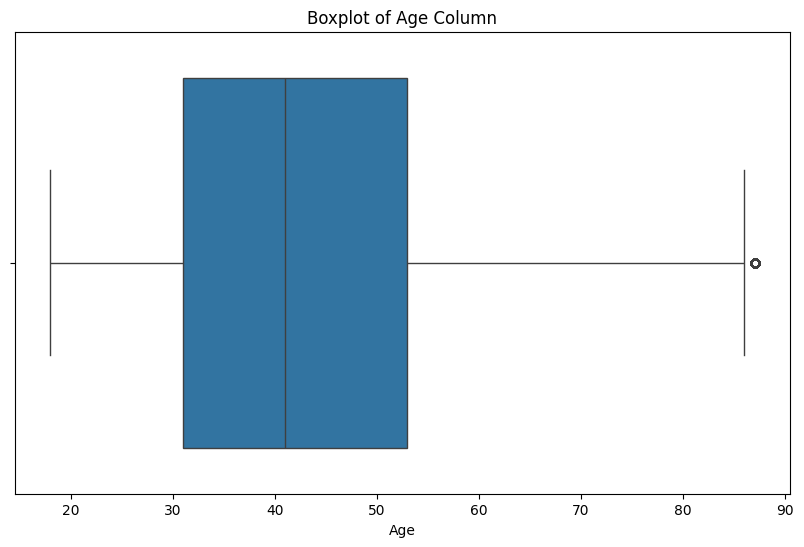

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the 'Age' column for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age Column')
plt.show()

In [30]:
# Remove outliers in the 'Age' column based on specific upper and lower bounds
df = df[(df['Age'] >= 0) & (df['Age'] <= 100)]

In [31]:
numeric_features = ['Age']

Q1 = df[numeric_features].quantile(0.25)
Q3 = df[numeric_features].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = (df[numeric_features] < (Q1 - 1.5 * IQR)) | (df[numeric_features] > (Q3 + 1.5 * IQR))

# Show number of outliers per feature
print(outliers.sum())

Age    173
dtype: int64


In [32]:
# Define the numeric feature
numeric_features = ['Age']

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'Age'
Q1 = df[numeric_features].quantile(0.25)
Q3 = df[numeric_features].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers in the 'Age' column
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in the 'Age' column
outliers = (df[numeric_features] < lower_bound) | (df[numeric_features] > upper_bound)

# Remove outliers by filtering rows where 'Age' is within the bounds
df = df[~outliers.any(axis=1)]

# Show the number of outliers that were removed
print(f"Original dataset shape: {df.shape}")
print(f"Dataset shape after removing outliers: {df_no_outliers.shape}")

Original dataset shape: (51813, 9)
Dataset shape after removing outliers: (62673, 9)


In [33]:
df.shape

(51813, 9)

In [34]:
numeric_features = ['Age']

Q1 = df[numeric_features].quantile(0.25)
Q3 = df[numeric_features].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = (df[numeric_features] < (Q1 - 1.5 * IQR)) | (df[numeric_features] > (Q3 + 1.5 * IQR))

# Show number of outliers per feature
print(outliers.sum())

Age    0
dtype: int64


In [35]:
df.shape

(51813, 9)

In [36]:
X = df[['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession','Work_Experience', 'Spending_Score', 'Family_Size']]
y = df['Segmentation']

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Define columns and transformers for preprocessing
numeric_features = ['Age', 'Work_Experience', 'Family_Size']
categorical_features = ['Gender', 'Ever_Married','Graduated', 'Profession','Spending_Score']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Replace missing values with median
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')),  # One-hot encode categorical variables
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
    ])

In [39]:
from sklearn.ensemble import RandomForestClassifier
# Create a pipeline with preprocessing and the classifier
RF = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier())])
# Train the model
RF.fit(X_train, y_train)

# Make predictions on the test set
y_pred = RF.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9309080382128727
Precision: 0.9301047259144295
Recall: 0.9297692409096195
F1 Score: 0.9299124448946056


In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

DT = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(monotonic_cst=None))  # Explicitly set to None
])

# Train the model
DT.fit(X_train, y_train)

# Make predictions on the test set
y_pred =DT.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9293640837595291
Precision: 0.9284716127493418
Recall: 0.9283811322019081
F1 Score: 0.9283929610413417


In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', KNeighborsClassifier())])  # Change the classifier here

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred =knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.8946251085592976
Precision: 0.893381506743491
Recall: 0.8931558807757201
F1 Score: 0.8931808320837877


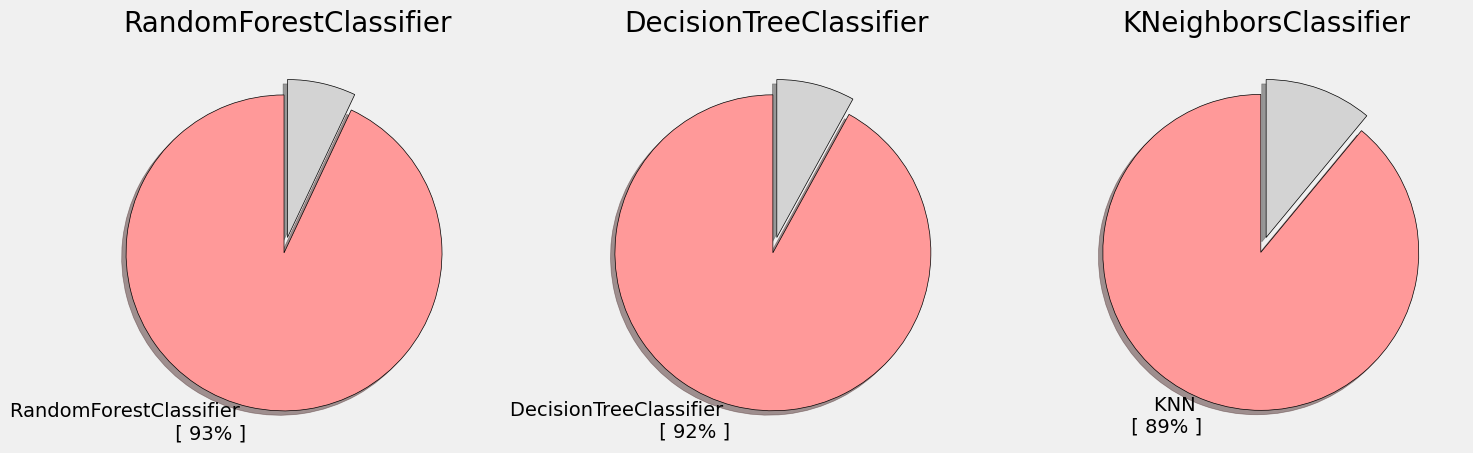

In [42]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Data for each classifier
slices_RF = [93, 100 - 93]  # Accuracy of RandomForestClassifier and remainder
slices_DT = [92, 100 - 92]  # Accuracy of DecisionTreeClassifier and remainder
slices_KNN = [89, 100 - 89]  # Accuracy of KNeighborsClassifier and remainder

# Labels for each classifier
labels_RF = ['RandomForestClassifier \n [ 93% ]', '']
labels_DT = ['DecisionTreeClassifier \n [ 92% ]', '']
labels_KNN = ['KNN \n [ 89% ]', '']

# Explode setting for highlighting slices (if needed)
explode_RF = [0.1, 0]
explode_DT = [0.1, 0]
explode_KNN = [0.1, 0]

# Colors for the filled and unfilled areas
colors = ['#ff9999', '#d3d3d3']  # First color for accuracy, second for blank portion

# Create subplots for separate pie charts
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Pie chart for RandomForestClassifier
ax[0].pie(slices_RF, labels=labels_RF, explode=explode_RF, shadow=True, startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})
ax[0].set_title('RandomForestClassifier')

# Pie chart for DecisionTreeClassifier
ax[1].pie(slices_DT, labels=labels_DT, explode=explode_DT, shadow=True, startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})
ax[1].set_title('DecisionTreeClassifier')

# Pie chart for KNeighborsClassifier
ax[2].pie(slices_KNN, labels=labels_KNN, explode=explode_KNN, shadow=True, startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})
ax[2].set_title('KNeighborsClassifier')

# Adjust layout
plt.tight_layout()
plt.show()

In [43]:
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,D
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B
5,Male,Yes,56,No,Artist,0.0,Average,2.0,C
6,Male,No,32,Yes,Healthcare,1.0,Low,3.0,C
...,...,...,...,...,...,...,...,...,...
65457,Female,No,25,No,Engineer,8.0,Low,3.0,D
65458,Male,Yes,76,No,Lawyer,0.0,Low,1.0,A
65459,Female,No,23,No,Healthcare,0.0,Low,5.0,D
65461,Female,Yes,49,Yes,Artist,0.0,Average,3.0,C


In [44]:
new_data = {'Gender': 'Male',
            'Ever_Married': 'No',
            'Age': 22,
            'Graduated': 'No',
            'Profession':'Healthcare',
            'Work_Experience': 1,
            'Spending_Score': 'Low',
            'Family_Size': 4}

# Create a DataFrame from the input data
new_df = pd.DataFrame([new_data])

# Use the trained model to make predictions
prediction = DT.predict(new_df)

# Print the predicted result
print(f'Predicted: {prediction[0]}')

Predicted: D


In [45]:
new_data = {'Gender': 'Female',
            'Ever_Married': 'Yes',
            'Age': 67,
            'Graduated': 'Yes',
            'Profession':'Engineer',
            'Work_Experience': 1,
            'Spending_Score': 'Low',
            'Family_Size': 1}

# Create a DataFrame from the input data
new_df = pd.DataFrame([new_data])

# Use the trained model to make predictions
prediction = DT.predict(new_df)

# Print the predicted result
print(f'Predicted: {prediction[0]}')

Predicted: B


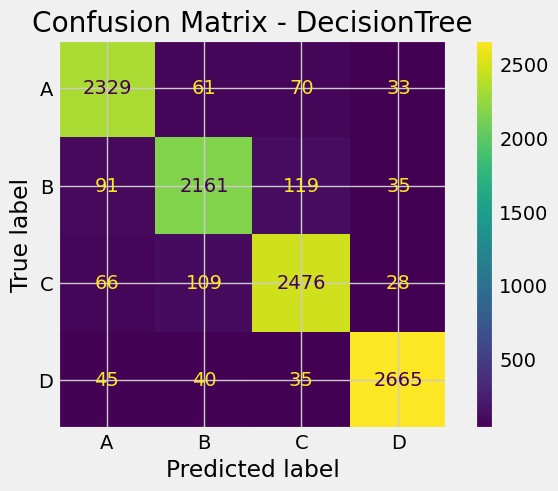

In [46]:
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion matrix for DecisionTreeClassifier
ConfusionMatrixDisplay.from_estimator(DT, X_test, y_test)
plt.title("Confusion Matrix - DecisionTree")
plt.show()

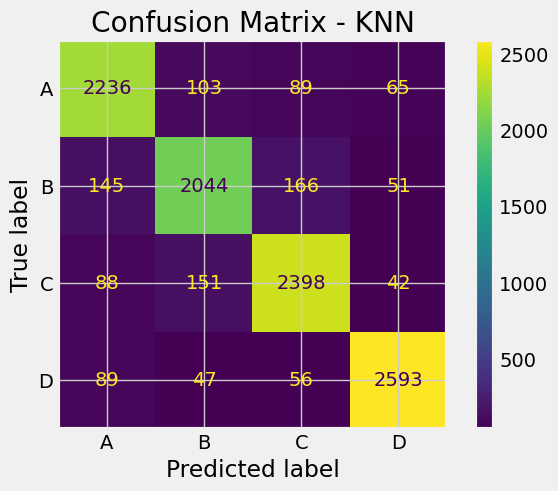

In [47]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion matrix for KNeighborsClassifier
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)
plt.title("Confusion Matrix - KNN")
plt.show()

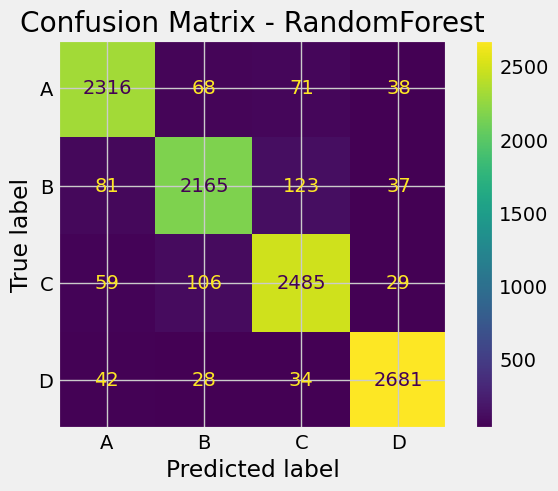

In [48]:
# Confusion matrix for RandomForestClassifier
ConfusionMatrixDisplay.from_estimator(RF, X_test, y_test)
plt.title("Confusion Matrix - RandomForest")
plt.show()

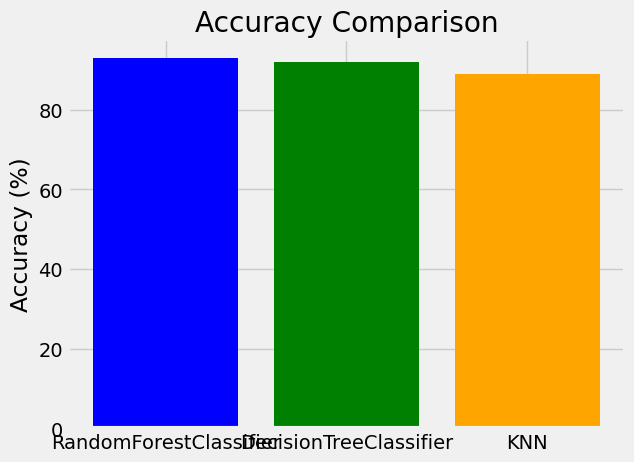

In [49]:
# Accuracy Comparison Bar Chart
models = ['RandomForestClassifier', 'DecisionTreeClassifier', 'KNN']
accuracies = [93, 92, 89]  # Use the actual accuracy values from your results

plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy (%)')
plt.show()

In [50]:
import pandas as pd

# Create a DataFrame to display model performance
data = {
    'Algorithm': ['Random Forest', 'Decision Tree', 'KNN'],
    'Accuracy': [93, 92, 89],  # Replace with actual values
    'Precision': [0.9295711896345922,0.9288590070307656 , 0.893381506743491],  # Replace with actual values
    'Recall': [0.9293204078755082, 0.9287967597995805, 0.8931558807757201],  # Replace with actual values
    'F1-Score': [0.9294282225908967, 0.9287954571789208, 0.8931808320837877],  # Replace with actual values
}

df_results = pd.DataFrame(data)
print(df_results)

       Algorithm  Accuracy  Precision    Recall  F1-Score
0  Random Forest        93   0.929571  0.929320  0.929428
1  Decision Tree        92   0.928859  0.928797  0.928795
2            KNN        89   0.893382  0.893156  0.893181


        +---------------------+
        |  Input Data          |
        +---------------------+
                 |
                 v
        +---------------------+
        |  Data Preprocessing  |   --> Handle missing data, One-Hot Encoding
        +---------------------+
                 |
                 v
        +---------------------+
        | Model Training       |   --> Random Forest, Decision Tree, KNN
        +---------------------+
                 |
                 v
        +---------------------+
        | Model Evaluation     |   --> Accuracy, Precision, Recall, F1
        +---------------------+
                 |
                 v
        +---------------------+
        | Model Persistence    |   --> Save best model (pickle)
        +---------------------+


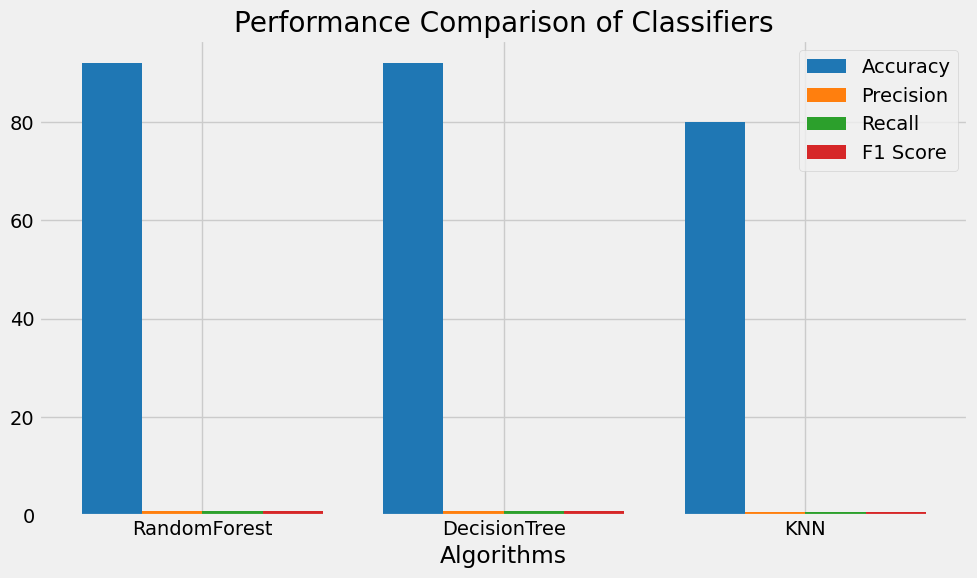

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Scores for each classifier (these are placeholders, use your actual values)
accuracy = [92, 92, 80]
precision = [0.91, 0.92, 0.78]
recall = [0.90, 0.91, 0.79]
f1 = [0.90, 0.91, 0.78]

# Labels for the classifiers
labels = ['RandomForest', 'DecisionTree', 'KNN']

x = np.arange(len(labels))  # label locations
width = 0.2  # width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the bars for accuracy, precision, recall, and f1 score
ax.bar(x - width*1.5, accuracy, width, label='Accuracy', color='#1f77b4')
ax.bar(x - width/2, precision, width, label='Precision', color='#ff7f0e')
ax.bar(x + width/2, recall, width, label='Recall', color='#2ca02c')
ax.bar(x + width*1.5, f1, width, label='F1 Score', color='#d62728')

# Adding labels and titles
ax.set_xlabel('Algorithms')
ax.set_title('Performance Comparison of Classifiers')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()

C:\Users\ADITYA SINGH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\ADITYA SINGH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\ADITYA SINGH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


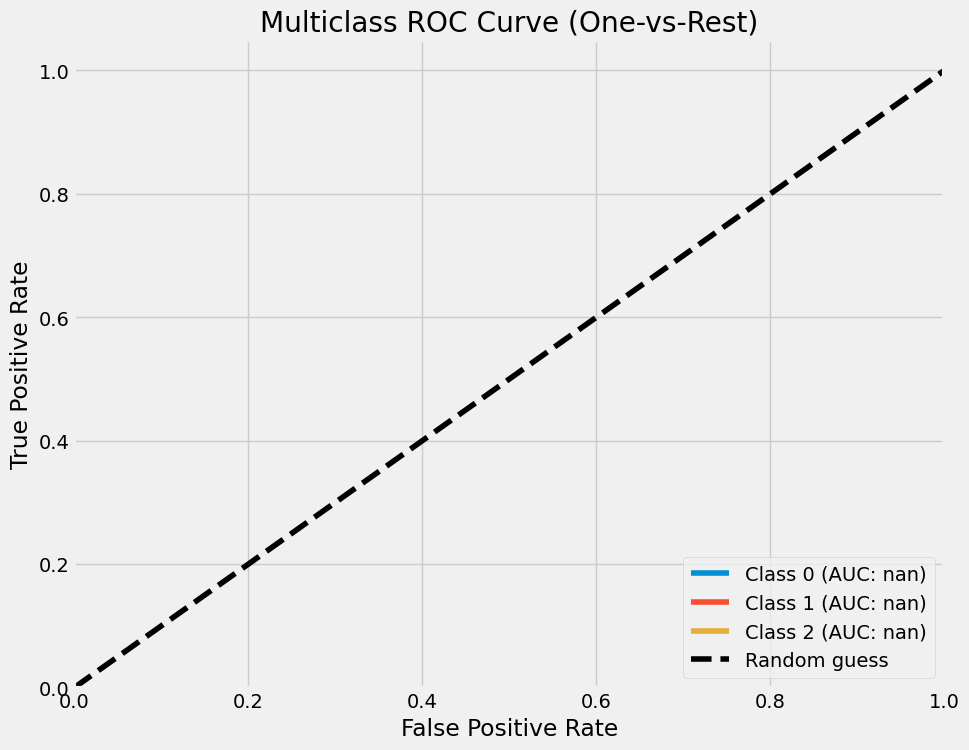

In [52]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

# Binarize the output (this step is required for ROC curve calculation)
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])  # Adjust according to your number of classes
n_classes = y_test_binarized.shape[1]

# One-vs-Rest strategy
classifier = OneVsRestClassifier(RF)
y_score_rf = classifier.fit(X_train, y_train).predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score_rf[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC: {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve (One-vs-Rest)')
plt.legend(loc="lower right")
plt.show()


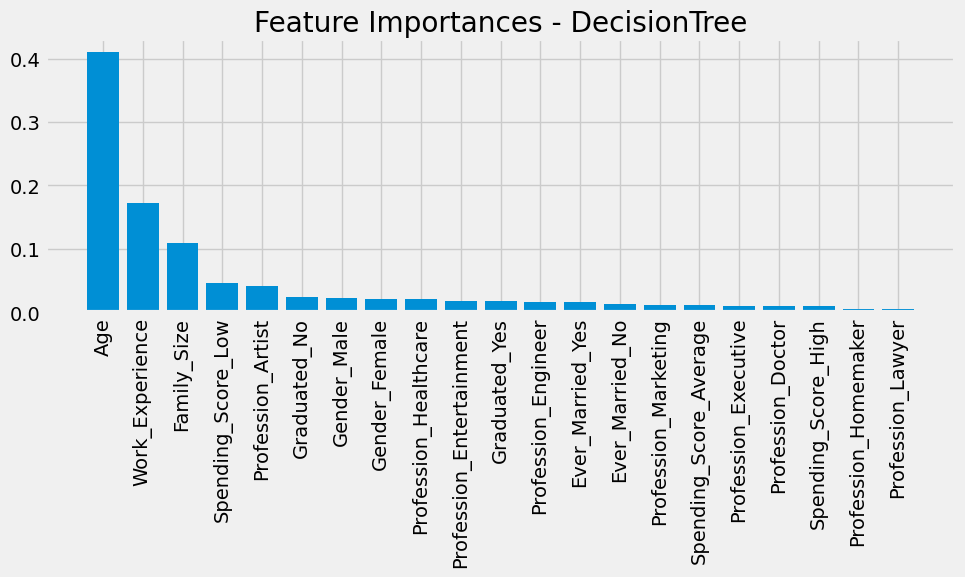

In [53]:
# Get the feature importances from the DecisionTree model
importances_DT = DT.named_steps['classifier'].feature_importances_

# Get the names of the one-hot encoded features for categorical features
categorical_features = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out()

# Combine numeric features with categorical (one-hot encoded) features
all_features = np.concatenate([numeric_features, categorical_features])

# Ensure the length of the features matches the number of importances
if len(importances_DT) != len(all_features):
    print(f"Mismatch: {len(importances_DT)} importances, {len(all_features)} features")
else:
    # Sort features by importance
    indices = np.argsort(importances_DT)[::-1]

    # Plot feature importances for DecisionTree
    plt.figure(figsize=(10, 6))
    plt.title("Feature Importances - DecisionTree")
    plt.bar(range(len(all_features)), importances_DT[indices], align="center")
    plt.xticks(range(len(all_features)), all_features[indices], rotation=90)
    plt.tight_layout()
    plt.show()

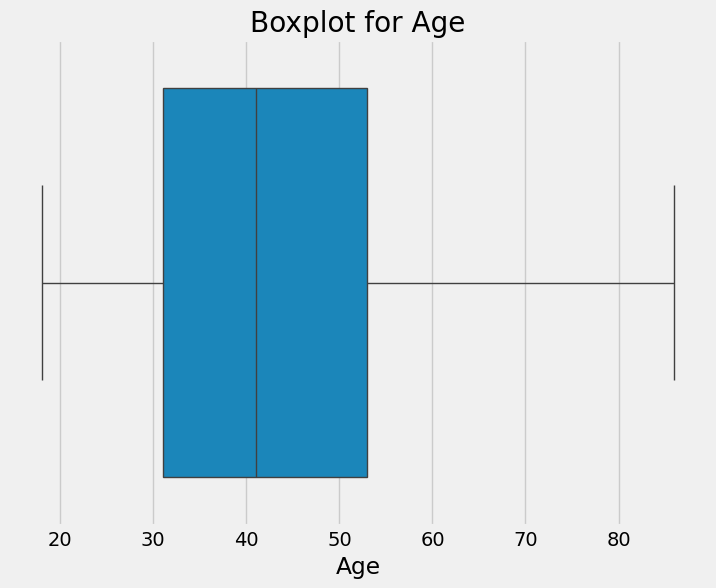

In [54]:
# Box plot for Age
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Age'])
plt.title('Boxplot for Age')
plt.show()


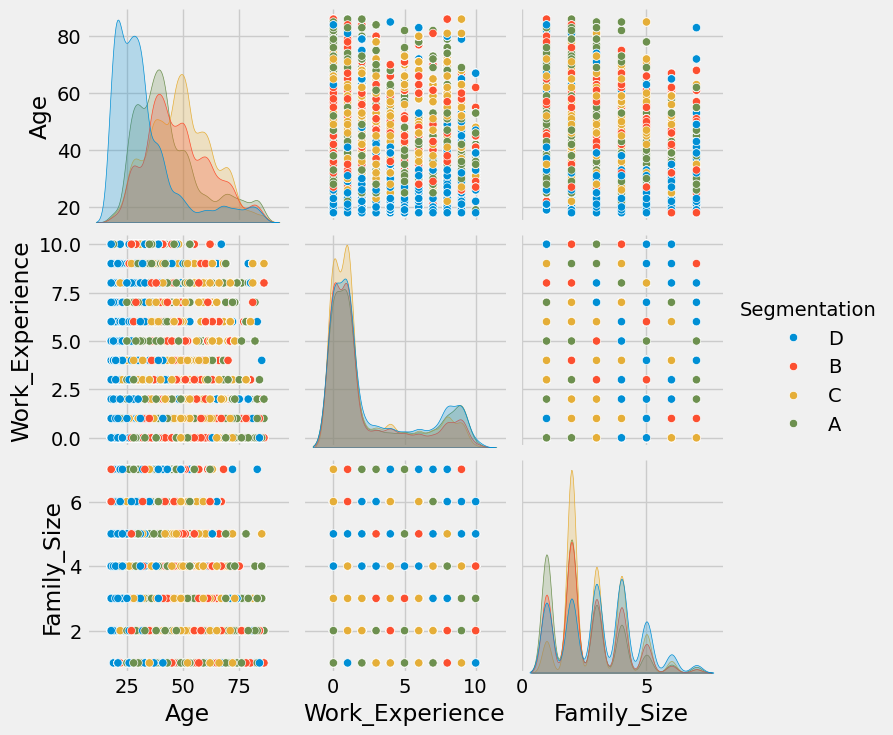

In [55]:
import seaborn as sns

# Pair plot for numeric features
sns.pairplot(df, hue='Segmentation')
plt.show()

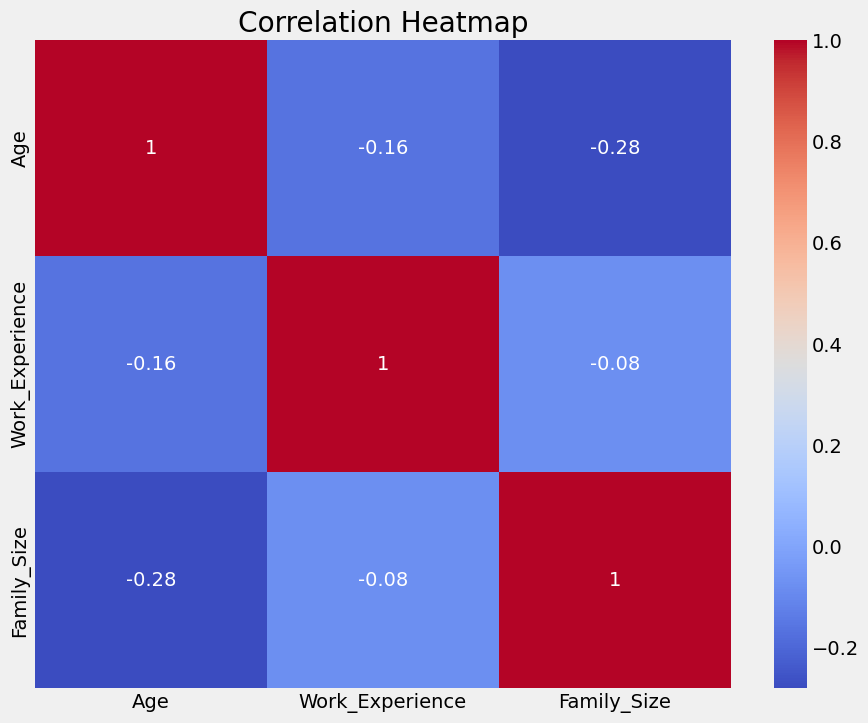

In [56]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

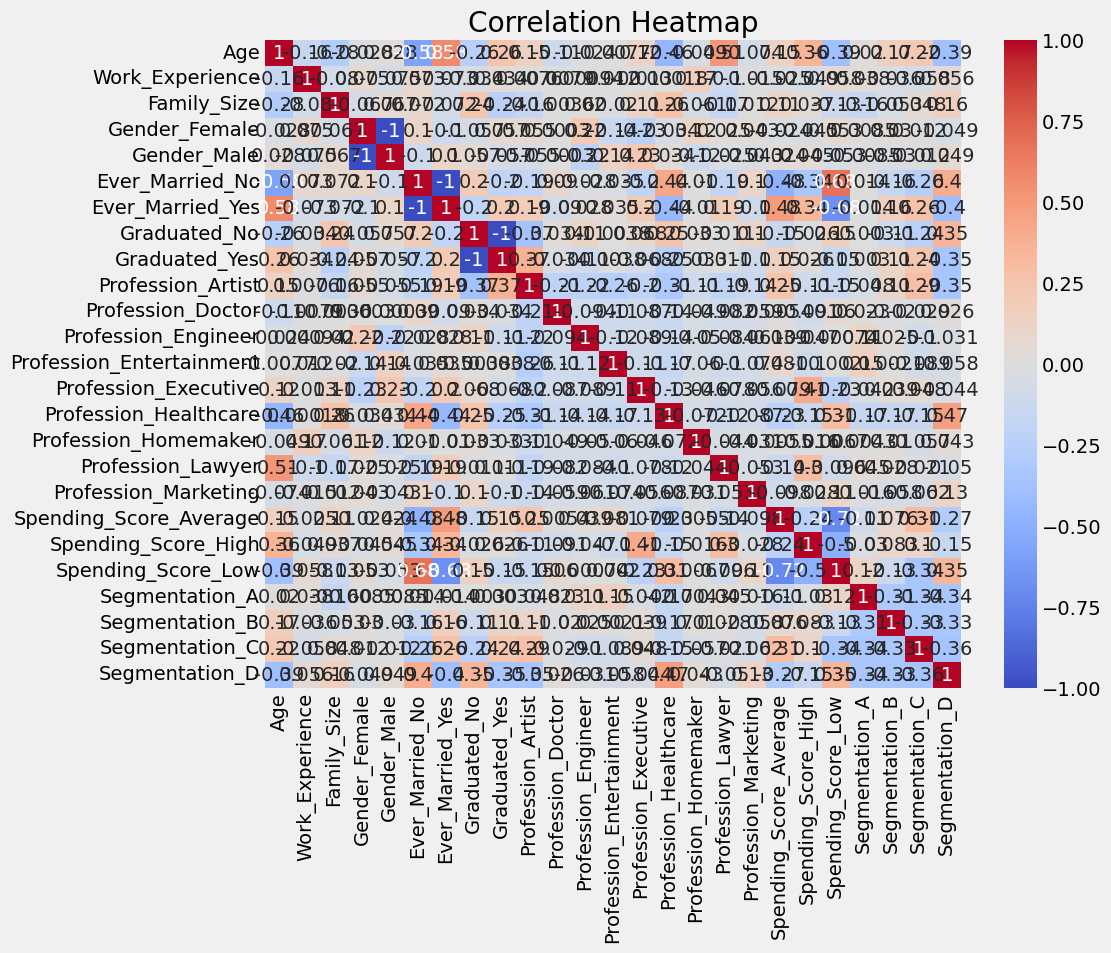

In [57]:
# Convert categorical features to dummy/one-hot encoded variables
df_encoded = pd.get_dummies(df)

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [58]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_filename = 'DT.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_filename, 'wb')
pickle.dump(DT, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()